- Giacomo Fidone, 531668, g.fidone1@studenti.unipi.it
- Virginia Ranciaro, 648374, v.ranciaro@studenti.unipi.it
- Vittorio Mussin, 649724, v.mussin@studenti.unipi.it
- Ilaria Salogni, 640991, i.salogni@studenti.unipi.it

# Report analisi dataset HR

Per la realizzazione del progetto abbiamo utilizzato le seguenti librerie:

In [133]:
#!pip install plotly
#!pip install cufflinks

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from datetime import datetime, date # libreria per la manipolazione delle date
from matplotlib.ticker import PercentFormatter # classe per la formattazione delle labels in percentuali
from matplotlib.patches import Rectangle # classe che implementa un oggetto rettangolo
from plotly.offline import iplot
import plotly as py
import cufflinks as cf

In [135]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

Il dataset in analisi è "HRDataset" (versione 14), che contiene informazioni relative ad una fittizia azienda statunitense:

In [136]:
df = pd.read_csv("HRDataset_v14.csv")

In [137]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [138]:
df.shape

(311, 36)

Il dataset è costituito da 311 osservazioni e 36 variabili di carattere sia quantitativo e qualitativo.

Di seguito settiamo lo stile dei grafici:

In [139]:
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
colors = ["#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8"]
col_rad = ["#f7fcfd", "#e5f5f9", "#ccece6", "#99d8c9", "#66c2a4", "#41ae76", "#238b45", "#006d2c", "#00441b"]

***

## 1. Data Cleaning e Data Enrichment

### 1.1 Correzione del dataset

Nell'esplorazione del dataset abbiamo riscontrato alcuni errori di registrazione, che abbiamo opportunamente corretto prima di iniziare le analisi.

1. Errore di battitura nella registrazione della modalità "Production" nella variabile "Department":

In [140]:
df.Department.unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [141]:
df.Department.replace({"Production       " : "Production"}, inplace=True)

2. Doppia registrazione della modalità "Data Analyst" della variabile "Position", dovuta ad un errore di battitura:

In [142]:
df.Position.unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [143]:
df.Position.replace({"Data Analyst ": "Data Analyst"}, inplace=True)

3. Mancata corrispondenza, rispetto a due occorrenze, tra la variabile nominale "PerformanceScore" ed il suo corrispettivo numerico "PerfScoreID":

<AxesSubplot:xlabel='PerformanceScore', ylabel='PerfScoreID'>

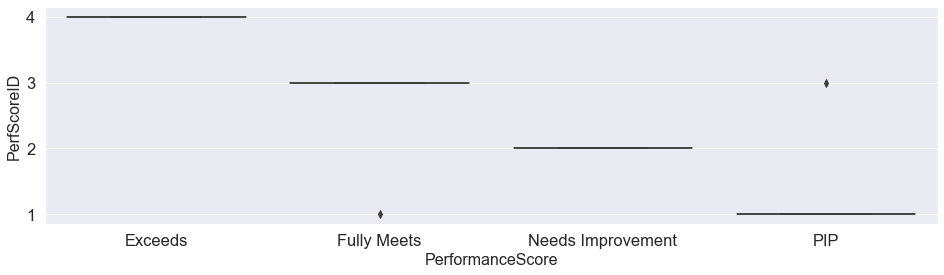

In [144]:
sns.boxplot(x="PerformanceScore", y="PerfScoreID", data=df)

Essendo più verosimile un errore di battitura nella registrazione di un valore numerico, abbiamo assunto che sia la variabile PerfScoreID a fornire, in tal caso, il dato errato:

In [145]:
df.loc[df.PerformanceScore=="Fully Meets", "PerfScoreID"] = 3
df.loc[df.PerformanceScore=="PIP", "PerfScoreID"] = 1

4. Mancata corrispondenza, rispetto a due occorrenze, tra la variabile nominale "Position" ed il suo corrispettivo numerico "PositionID":

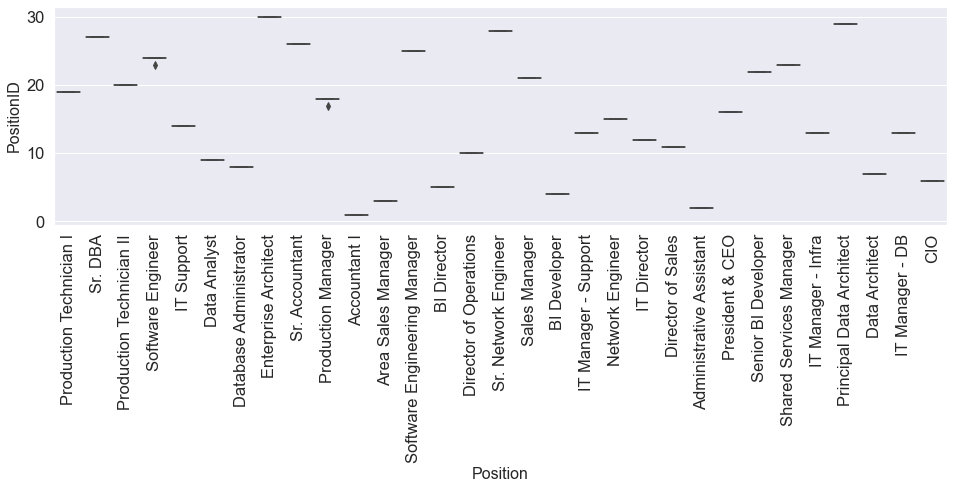

In [146]:
sns.boxplot(x="Position", y="PositionID", data=df)
plt.xticks(rotation=90)
plt.show()

In [147]:
df.loc[df.Position=="Software Engineer", "PositionID"] = 24
df.loc[df.Position=="Production Manager", "PositionID"] = 18

4. Mancata corrispondenza, rispetto ad una occorrenza, tra la variabile nominale "ManagerName" ed il suo corrispettivo numerico "ManagerID":

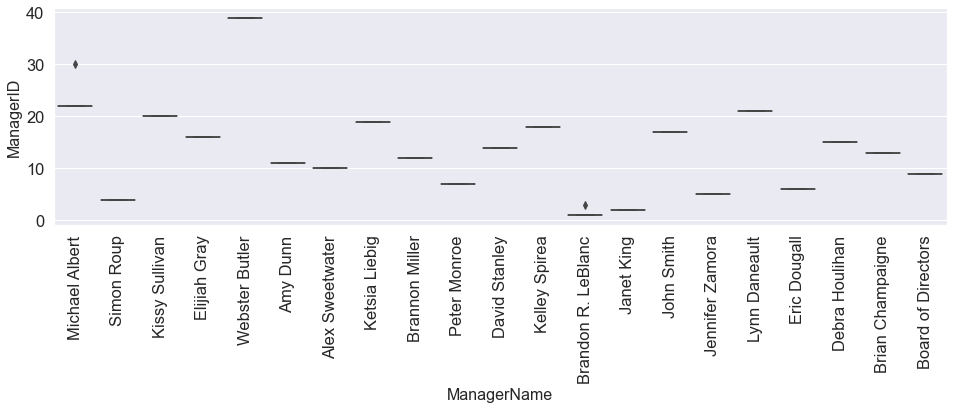

In [148]:
sns.boxplot(x="ManagerName", y="ManagerID", data=df)
plt.xticks(rotation=90)
plt.show()

In [149]:
df.loc[df.ManagerName=="Michael Albert", "ManagerID"] = 22
df.loc[df.ManagerName=="Brandon R. LeBlanc", "ManagerID"] = 1

5. Doppia versione delle modalità nominali della variabile "HispanicLatino", ovvero "yes"/"Yes" e "no"/"No":

In [150]:
df.HispanicLatino.unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [151]:
df.HispanicLatino.replace({"Yes" : "yes"}, inplace=True)
df.HispanicLatino.replace({"No" : "no"}, inplace=True)

### 1.2 Enrichment

La nostra analisi ha richiesto l'inserimento di nuove variabili non presenti nel dataset originario:

1. La variabile quantitativa "Age", che indica l'età del dipendente;

In [152]:
now = datetime.now()
ages = []
for index, row in df.iterrows(): 
    date = row["DOB"][:6] + "19" + row["DOB"][6:] # conversione delle date nel formato %m/%d/%Y
    born = datetime.strptime(date, "%m/%d/%Y") # istanziazione dell'oggetto datetime
    age = now.year - born.year - ((now.month, now.day) < (born.month, born.day)) # calcolo dell'età
    ages.append(age)
df["Age"] = ages

2. La variabile nominale dicotomica "LateOrPunctual", che indica se il dipendente ha effettuato dei ritardi negli ultimi 30 giorni;

In [153]:
values = []
for index, row in df.iterrows():
    # Se "DaysLateLast30" è maggiore di 0, value è "Late", "Punctual" altrimenti.
    value = str(np.where(row["DaysLateLast30"] > 0, "Late", "Punctual"))
    values.append(value)
df["LateOrPunctual"] = values

3. La variabile quantitativa discreta "DurataContratto", che indica la durata in giorni del contratto dei dipendenti non più attivi;

In [154]:
durata=[]
for i in range(len(df["DateofHire"])): #Calcolo della durata del contratto degli ex-dipendenti
    try:
        durata.append((datetime.strptime(df["DateofTermination"][i], '%m/%d/%Y')-datetime.strptime(df["DateofHire"][i], '%m/%d/%Y')).days)
    except:
        durata.append(None)
df['DurataContratto']=durata

4. Le variabili nominali "MotiviLicenziati" e "MotiviDimessi", ciascuna delle quali raggruppa i motivi di licenziamento e di dimissioni in due macrocategorie (rispettivamente performance-condotta e insoddisfatti-scelte personali):

In [155]:
performance=["attendance","performance","no call, no show"]
condotta=["Fatal attraction", "Learned that he is a gangstar", "gross misconduct"]
Perf=[] #lista che conterrà i valori della nuova colonna del dataframe
for i in df["TermReason"]:
    if i in performance and i not in condotta:
        Perf.append("performance")
    if i in condotta and i not in performance:
        Perf.append("condotta")
    if i not in condotta and i not in performance:
        Perf.append(None)
df["MotiviLicenziati"]=Perf
insoddisfatti=["unhappy","more money", "hours", "relocation out of area"]
scelte_personali=["Another position", "career change", "return to school", "military", "retiring", "maternity leave - did not return", "medical issues"]
Perf=[] #lista che conterrà i valori della nuova colonna del dataframe
for i in df["TermReason"]:
    if i in insoddisfatti and i not in scelte_personali:
        Perf.append("insoddisfatti")
    if i in scelte_personali and i not in insoddisfatti:
        Perf.append("scelte personali")
    if i not in scelte_personali and i not in insoddisfatti:
        Perf.append(None)
df["MotiviDimessi"]=Perf

5. La variabile nominale "Races", costruita sostituendo i valori di RaceDesc dei dipendenti "HispanicLatino" con "Hispanic":

In [156]:
df["Races"]=df.RaceDesc
df.loc[df.HispanicLatino=="yes","Races"]="Hispanic"

### 1.3 Gestione degli outliers

In questa sezione definiamo un insieme di funzioni per il controllo e la gestione degli outliers nelle variabili quantitative del dataset. Definiamo anzitutto due funzioni per il calcolo dei *fences*:

In [157]:
def lowerfence(s):
    Q1 = s.quantile(0.25, interpolation="linear")
    Q3 = s.quantile(0.75, interpolation="linear")
    lowerfence = Q1 - 1.5*(Q3-Q1)
    return lowerfence

In [158]:
def upperfence(s):
    Q1 = s.quantile(0.25, interpolation="linear")
    Q3 = s.quantile(0.75, interpolation="linear")
    upperfence = Q3 + 1.5*(Q3-Q1)
    return upperfence

Usando la funzioni lowerfence() e upperfence() definiamo una terza funzione per verificare l'eventuale presenza di outliers nella distribuzione di una variabile quantitativa (s). Poiché la definizione di outlier è basata sulla differenza interquartile (IQR), la funzione dovrà anche verificare che l'IQR della distribuzione non sia nullo, perché diversamente verrebbero considerati come outliers tutti i valori eccetto il valore mediano:

In [159]:
def check_outliers(s):
    if sp.iqr(s) != 0:
        if s.max() >= upperfence(s) or s.min() <= lowerfence(s):
                return True
    return False

Definiamo una funzione che, dati un dataframe ed una sua colonna, restituisce una copia del dataframe in cui la colonna è stata ripulita dagli outliers – se la colonna di partenza non ha outliers, la funzione restituisce il dataframe originale:

In [160]:
def df_no_outliers(df, col):
     if check_outliers(df[col]):
        return df.loc[(df[col] > lowerfence(df[col])) & (df[col] < upperfence(df[col]))]
     return df

Definiamo infine una funzione che, dati un dataframe ed una sua colonna, restituisce una copia del dataframe in cui la colonna ha solo outliers – se la colonna ha solo outliers, restituisce il dataframe stesso:

In [161]:
def df_only_outliers(df, col):
     if check_outliers(df[col]):
        return df.loc[(df[col] < lowerfence(df[col])) | (df[col] > upperfence(df[col]))]
     return df

Le tre funzioni potranno essere invocate, qualora l'analisi lo richieda, per il controllo e la gestione degli outliers.

___

## 2. Test di normalità e di affidabilità della media

In questa sezione definiamo due funzioni utili al controllo della normalità di una distribuzione e dell'affidabilità del suo valore medio.

La funzione per il controllo della normalità verifica che la *skewness* della distribuzione sia compresa tra -0.5 e 0.5. Come range per il valore della curtosi abbiamo scelto quello compreso tra -0.3 e 0.3 – in caso di test positivo, il valore della curtosi verrà indagato più nel dettaglio:

In [162]:
def is_normal(s):
    if s.skew() < 0.5 and s.skew() > -0.5:
        if s.kurt() < 0.3 and s.kurt() > -0.3:
            return True
    return False

Come indici sintetici per la descrizione delle distribuzioni verranno usati, laddove possibile, la media e la deviazione standard – ovvero laddove la deviazione standard della distribuzione è strettamente inferiore al 30% della media; diversamente, verranno usati la mediana e lo scarto interquartile (IQR) o il range. Di seguito definiamo una funzione che verifica l'affidabilità della media rispetto al valore della deviazione standard di una distribuzione:

In [163]:
def mean_reliable(s):
    if np.std(s) < (np.mean(s)*30) / 100:
        return True
    return False

La funzione potrà essere utilizzata nel corso dell'analisi per supportare la selezione dell'appropriato indice di centralità e del correlato indice di dispersione.

***

## 3. Performance aziendale

In questa sezione si analizza la distribuzione della performance aziendale – espressa dalle variabili "PerformanceScore" e "PerfScoreID" – e si considerano possibili fattori di correlazione. 

### 3.1. Distribuzione della performance aziendale

In [164]:
mean_reliable(df["PerfScoreID"])

True

In [165]:
df["PerfScoreID"].describe()

count    311.000000
mean       2.977492
std        0.587072
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: PerfScoreID, dtype: float64

In [166]:
df["PerfScoreID"].mode()

0    3
dtype: int64

Rispetto alla distribuzione globale, si può stimare un buon livello di performance aziendale, con una media del 2.98, un valore che approssima la soglia della positività ("Fully Meets"). Visto l'IQR nullo, i dati con indice di performance 3 rappresentano gran parte della distribuzione. Anche il valore della moda (3) conferma questo dato. 

In termini percentuali, solo il 10% del personale richiede un intervento ("Needs Improvement") o rientra già in un *Performance Improvement Plan* ("PIP"), come mostrato dal grafico a torta [1]:

In [167]:
# calcolo delle frequenze assolute di "PerformanceScore":
freq_abs = pd.crosstab(df["PerformanceScore"], columns="Absolute Frequence", colnames=[""])

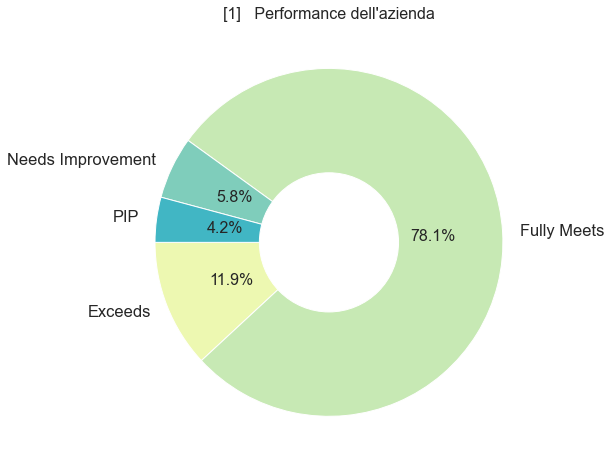

In [168]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.pie(freq_abs["Absolute Frequence"], labels=["Exceeds", "Fully Meets", "Needs Improvement", "PIP"], startangle=180,
        autopct="%1.1f%%", colors=colors)
plt.title("[1]   Performance dell'azienda")
circle = plt.Circle(xy=(0,0), radius=0.4, facecolor='white') #effetto torta vuota
plt.gca().add_artist(circle)
plt.show()

La distribuzione della performance nelle sezioni aziendali registra invece interessanti elementi di variazione:

In [169]:
for dep in df.Department.unique():
    d = df[df.Department==dep]
    # verifichiamo l'affidabilità della media del PerfScoreID per ciascuna sezione aziendale:
    if mean_reliable(d.PerfScoreID):
        print("Media della performance nella sezione", dep, ":",  round(d.PerfScoreID.mean(), 2))

Media della performance nella sezione Production : 2.98
Media della performance nella sezione IT/IS : 3.06
Media della performance nella sezione Software Engineering : 3.09
Media della performance nella sezione Admin Offices : 3.0
Media della performance nella sezione Sales : 2.77
Media della performance nella sezione Executive Office : 3.0


Notiamo che solo la sezione "Sales" ha una performance inferiore alla media globale. Un solo valore coincide con la media globale ("Production"), mentre i restanti si collocano sopra la media globale, con un picco nella sezione di Software Engineering. 

Vediamo in che modo le quote percentuali di dipendenti si distribuiscono, secondo la performance, nelle sezioni aziendali:

In [170]:
d = pd.crosstab(df["Department"], df["PerformanceScore"], normalize="index")*100 # conversione dei dati in percentuale
ax = d.iplot(kind="bar", barmode="stack", title="[2]   Performance per sezione aziendale", yTitle="Frequenza percentuale", color=colors)

Le sezioni di Sales e Production sono, nell'ordine, le sezioni con quote percentuali maggiori di dipendenti con basso indice di performance.

### 3.2. Fattori di correlazione

In questa sezione valutiamo i possibili fattori che incidono sull'indice di performance dei dipendenti. Per la valutazione delle possibili correlazioni tra le variabili quantitative del dataset, verifichiamo prima la normalità di ciascuna distribuzione:

In [171]:
var_quant = ["PerfScoreID", "EngagementSurvey", "EmpSatisfaction", "SpecialProjectsCount", "Salary", "DaysLateLast30",
           "Absences", "Age"]

In [172]:
for var in var_quant:
    if is_normal(df[var]):
        print("La distribuzione di", var, "è normale.")
    else:
        print("La distribuzione di", var, "non è normale.")

La distribuzione di PerfScoreID non è normale.
La distribuzione di EngagementSurvey non è normale.
La distribuzione di EmpSatisfaction non è normale.
La distribuzione di SpecialProjectsCount non è normale.
La distribuzione di Salary non è normale.
La distribuzione di DaysLateLast30 non è normale.
La distribuzione di Absences non è normale.
La distribuzione di Age non è normale.


Come mostrato dai risultati del test, nessuna variabile quantitativa del dataset ha una distribuzione normale. La valutazione delle possibili correlazioni nella heatmap che segue verrà quindi eseguita usando il coefficiente di Spearman (ρ) e non il coefficiente di default (Pearson R).

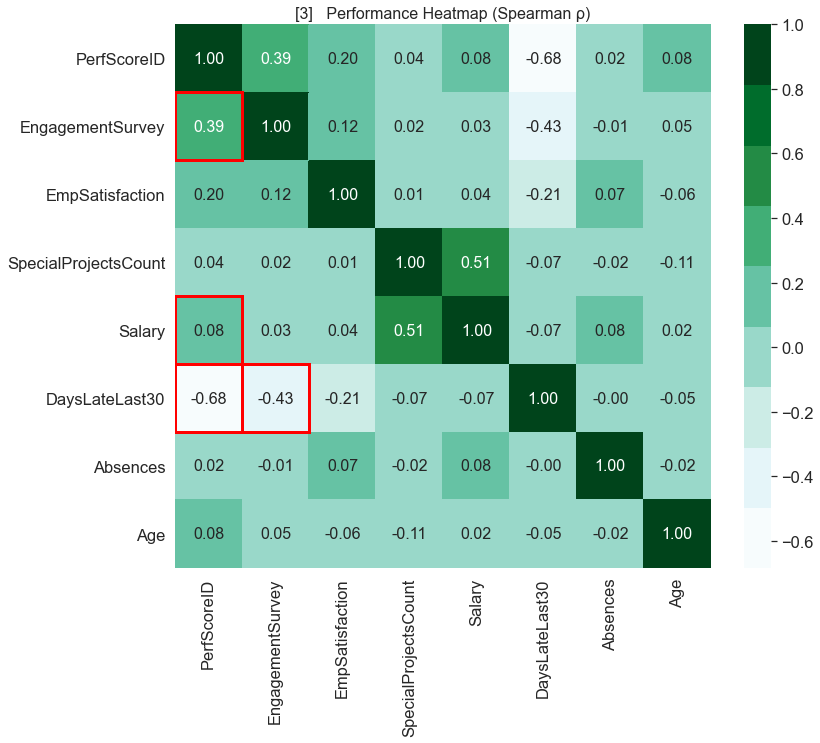

In [173]:
n = df[var_quant] # nuovo df che prende solo le variabili quantitative 
plt.rcParams["figure.figsize"] = [12, 10]
ax = sns.heatmap(n.corr("spearman"), annot=True, fmt=".2f", cmap=["#f7fcfd", "#e5f5f9", "#ccece6", "#99d8c9", 
                                                        "#66c2a4", "#41ae76", "#238b45", "#006d2c", "#00441b"])
plt.title("[3]   Performance Heatmap (Spearman ρ)")

# aggiunta di oggetti Rectangle per evidenziare le correlazioni significative
ax.add_patch(Rectangle((0, 5), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((0, 4), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((0, 1), 1, 1, fill=False, edgecolor='red', lw=3))
ax.add_patch(Rectangle((1, 5), 1, 1, fill=False, edgecolor='red', lw=3))
plt.show()

La heatmap [3] ci restituisce un quadro abbastanza completo delle possibili correlazioni. I valori significativi sono:

1. Una correlazione debolmente positiva (0.39) tra la performance e l'engagement.
2. Una correlazione negativa (-0.68) tra la performance e i giorni di ritardo (negli ultimi 30 giorni) – curiosamente, non si registra una correlazione analoga con le assenze ("Absences").
3. Una correlazione debolmente negativa (-0.43) tra i giorni di ritardo e l'engagement.

Un valore che potrebbe avere una correlazione con la performance è lo stipendio ("Salary"). Il dato presentato dalla heatmap [3] (0.08) – di per sé poco significativo – non è tuttavia attendibile, in quanto lo stipendio non può essere considerato separatamente dalla professione svolta. L'analisi della correlazione stipendio-performance dovrà quindi essere svolta a parità di posizione.

### 3.2.1. Correlazione con i ritardi a lavoro

Dalla heatmap [3] abbiamo riscontrato una netta correlazione negativa tra la performance del dipendente ed il numero di ritardi sul posto di lavoro. Di seguito verifichiamo se la distribuzione dei ritardi nei dipartimenti sia correlata alla distribuzione della performance già vista nel grafico [2]:

In [174]:
f = pd.crosstab(df["Department"], df["LateOrPunctual"], normalize = "index")*100 
f.columns=["In ritardo", "Puntuali"]
ax = f.iplot(kind="bar", barmode="stack", title="[4]   Percentuale di dipendenti puntuali e in ritardo nelle sezioni aziendali", 
            yTitle="Frequenza percentuale", color=colors)

Come si evince dal grafico [4], le sezioni aziendali in cui si riscontrano quote più alte di dipendenti ritardatari sono le stesse che presentano una performance media più bassa e quote percentuali maggiori di dipendenti con basso indice di performance (grafico [2]).

In [175]:
mean_reliable(df.DaysLateLast30)

False

In [176]:
check_outliers(df.DaysLateLast30)

False

Poiché la media non è affidabile e la distribuzione non contiene outliers, considereremo qui come indici sintetici per la descrizione di "DaysLateLast30" la mediana ed il range.

In [177]:
df.DaysLateLast30.describe()

count    311.000000
mean       0.414791
std        1.294519
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: DaysLateLast30, dtype: float64

In [178]:
for department in df.Department.unique():
    dep = df[df.Department == department]
    print(department, "\n", "Mediana:", dep.DaysLateLast30.median(), "\n", "Range: ", dep.DaysLateLast30.min(), ",", dep.DaysLateLast30.max(), "\n")

Production 
 Mediana: 0.0 
 Range:  0 , 6 

IT/IS 
 Mediana: 0.0 
 Range:  0 , 4 

Software Engineering 
 Mediana: 0.0 
 Range:  0 , 4 

Admin Offices 
 Mediana: 0.0 
 Range:  0 , 0 

Sales 
 Mediana: 0.0 
 Range:  0 , 6 

Executive Office 
 Mediana: 0.0 
 Range:  0 , 0 



Sebbene il valor mediano sia 0 in tutte le sezioni aziendali, osserviamo che le sezioni con quote percentuali maggiori di dipendenti ritardatari ("Sales" e "Production") sono anche quelle che registrano la presenza di dipendenti con un numero complessivo di ritardi (effettuati negli ultimi 30 giorni) maggiore di 4.

Vista la correlazione negativa tra ritardi ed engagement osservata nell'heatmap [3], valutiamo l'andamento della correlazione in ciascuna sezione aziendale:

In [179]:
mean_reliable(df.EngagementSurvey)

True

In [180]:
df.EngagementSurvey.describe()

count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey, dtype: float64

Anche il valore globale dell'engagement, con una media di 4.11 e una deviazione standard di 0.79, è da considerarsi positivo. 

In [181]:
plt.rcParams["figure.figsize"] = [15, 5]
a = pd.crosstab(df["Department"], df["DaysLateLast30"], values=df["EngagementSurvey"], aggfunc=np.mean)
a.iplot(kind="bar", title="[5]   Engagement medio rispetto ai giorni di ritardo nelle sezioni aziendali", 
       yTitle="Engagement medio", color=["#ccece6", "#99d8c9", "#66c2a4","#41ae76", "#238b45", "#006d2c", "#00441b"])

Il grafico [5] conferma l'andamento previsto: i dipendenti che effettuano un maggior numero di ritardi sono associati ad un minor grado di engagement in tutte le sezioni aziendali – con l'unica eccezione della sezione IT/IS. Poiché i valori mostrati nel grafico [5] sono valori medi, la loro affidabilità dovrà essere valutata rispetto alle singole distribuzioni di cui sono rappresentativi:

In [182]:
print("Distribuzioni con outliers la cui media non è affidabile:\n")
for dep in df.Department.unique():
    d = df[df["Department"]==dep] # seleziono un subset da df per dipartimento
    for days in d.DaysLateLast30.unique():
        r = d[d["DaysLateLast30"]==days] # seleziono un subset da d per giorni di ritardo
        if not mean_reliable(r["EngagementSurvey"]): # controllo se la media non è affidabile
            if check_outliers(r["EngagementSurvey"]): # controllo se ci sono outliers
                # calcolo la media:
                print(dep, "-", days, "giorni di ritardo", "\nMedia con outliers:", round(r.EngagementSurvey.mean(), 2))
                print("Affidabilità media con outliers:", mean_reliable(r["EngagementSurvey"]))
                r = df_no_outliers(r, "EngagementSurvey") # elimino gli outliers
                # ricalcolo la media e ricontrollo se è affidabile:
                print("Media senza outliers:", round(r.EngagementSurvey.mean(), 2))
                print("Affidabilità media senza outliers:", mean_reliable(r["EngagementSurvey"]))
              

Distribuzioni con outliers la cui media non è affidabile:

Production - 5 giorni di ritardo 
Media con outliers: 2.92
Affidabilità media con outliers: False
Media senza outliers: 2.5
Affidabilità media senza outliers: True


Come mostrato dall'esito del test, la media dell'engagement dei dipendenti di Production che hanno effettuato 5 giorni di ritardo è inferiore rispetto al valore mostrato nel grafico [5], dato che conferma ulteriormente la correlazione negativa tra le due variabili.

### 3.2.2. Correlazione con lo stipendio

Il dato dello stipendio registra variazioni significative a seconda della professione svolta all'interno dell'azienda ("Position"). Per questa ragione le possibili correlazioni con la performance devono essere valutate a parità di posizione. A questo scopo calcoliamo i coefficienti di Spearman tra performance e stipendio relativi alle posizioni aziendali in cui si registrano variazioni di performance: 

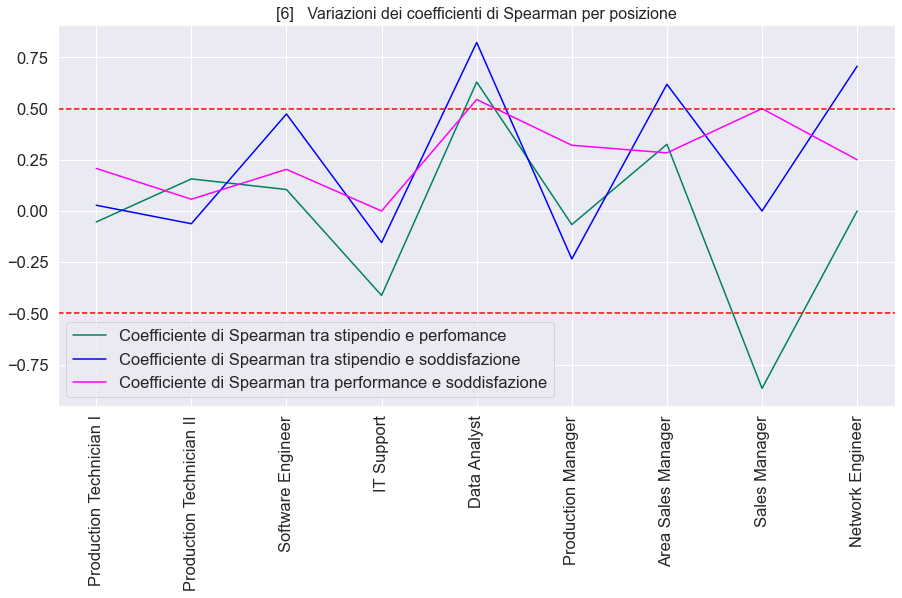

In [183]:
plt.rcParams["figure.figsize"] = (15, 7)

# creazione dei DataFrame per il pd.plot()
pear_perf = pd.DataFrame(columns=["Coefficiente di Spearman"])
pear_sat = pd.DataFrame(columns=["Coefficiente di Spearman"])
pear_perfsat = pd.DataFrame(columns=["Coefficiente di Spearman"])

# iterazione per il calcolo dei coefficienti di Pearson per ogni posizione
for position in df["Position"].unique():
    df1 = df[df["Position"] == position]
    if np.std(df1["PerfScoreID"]) != 0: # selezione delle posizioni in cui il "PerfScoreID" ha deviazione standard diversa da 0
        pear1 = sp.spearmanr(df1["Salary"], df1["PerfScoreID"])[0]
        pear2 = sp.spearmanr(df1["Salary"], df1["EmpSatisfaction"])[0]
        pear3 = sp.spearmanr(df1["PerfScoreID"], df1["EmpSatisfaction"])[0]
        # inserimento dei coefficienti nei DataFrame
        pear_perf.loc[position] = pear1
        pear_sat.loc[position] = pear2
        pear_perfsat.loc[position] = pear3
        
ax = pear_perf.plot(title="[6]   Variazioni dei coefficienti di Spearman per posizione", colormap="summer")
ax2 = pear_sat.plot(colormap="winter", ax=ax)
ax3 = pear_perfsat.plot(colormap="spring", ax=ax)  
ax.legend(labels=["Coefficiente di Spearman tra stipendio e perfomance", "Coefficiente di Spearman tra stipendio e soddisfazione", 
                  "Coefficiente di Spearman tra performance e soddisfazione"])
plt.xticks(rotation=90)
ax.axhline(0.50, linestyle="--", color="r")
ax.axhline(-0.50, linestyle="--", color="r")
plt.show()

In [184]:
f = pd.DataFrame()
for index, row in pear_perf.iterrows():
    a = df[df.Position==index]
    f = f.append(a)

In [185]:
df_medie = pd.crosstab(f.Position, columns="Salary", values=f.Salary, aggfunc=np.mean, colnames=[""]).sort_values("Salary")

In [186]:
df_medie.iplot(kind="bar", color=colors, title="[7]   Stipendio medio annuo per posizione aziendale", 
               yTitle="Stipendio medio annuo")

Il grafico [7] mostra i valori medi dello stipendio per ciascuna delle posizioni considerate nel grafico [6]. Anche qui, l'affidabilità di ciascun valore medio verrà testata su ciascuna delle distribuzioni di cui il valore medio è rappresentativo:

In [187]:
for pos in f.Position.unique():
    p = f[f.Position==pos]
    print(pos, "\nMedia affidabile:", mean_reliable(p.Salary), "\n")

Production Technician I 
Media affidabile: True 

Production Technician II 
Media affidabile: True 

Software Engineer 
Media affidabile: True 

IT Support 
Media affidabile: True 

Data Analyst 
Media affidabile: True 

Production Manager 
Media affidabile: True 

Area Sales Manager 
Media affidabile: True 

Sales Manager 
Media affidabile: True 

Network Engineer 
Media affidabile: True 



Osserviamo che i valori significativi degli indici di correlazione nel grafico [6] sono associati ad alcune tra le professioni più remunerative. Il caso più evidente è quello del Data Analyst, in cui tutte e tre correlazioni hanno valore positivo. Si può ipotizzare che lo stipendio incida in tal caso sulla soddisfazione del dipendente, la quale a sua volta risulterebbe in un incremento della sua prestazione lavorativa. Un andamento simile, pur meno marcato, può essere osservato nelle posizioni di Software Engineer e di Area Sales Manager.

___

##    4. Parità di genere

L'obiettivo di questa sezione è approfondire l'aspetto della parità di genere all'interno dell'azienda. In base ai dati a disposizione, si è scelto di valutare il gender balance, l'eventuale presenza di un divario salariale e la relazione tra stato civile e assenze.

### 4.1. Gender balance

In [188]:
gdr_dist = pd.crosstab(df["GenderID"], columns="Absolute Frequence", colnames=[""])

Il grafico seguente mostra il gender balance all'interno dell'azienda, ovvero la percentuale di occupazione femminile e maschile in rapporto al totale:

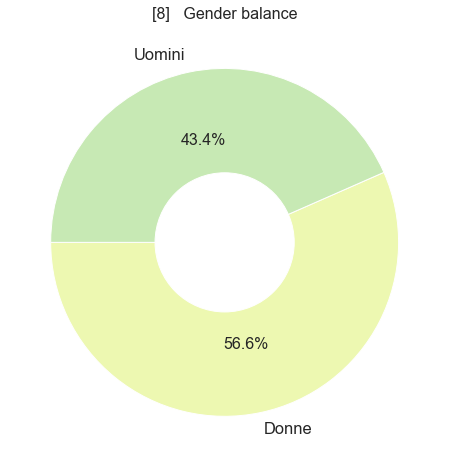

In [189]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.pie(gdr_dist["Absolute Frequence"], labels=["Donne", "Uomini"], startangle=180, autopct="%1.1f%%", colors=colors)
plt.title("[8]   Gender balance")
circle = plt.Circle(xy=(0,0), radius=0.4, facecolor='white') #effetto torta vuota
plt.gca().add_artist(circle)
plt.show()

La distribuzione globale degli impiegati rispetto al genere è abbastanza omogenea, con una lieve prevalenza del personale femminile su quello maschile. 

Di seguito si rappresenta il gender balance nelle diverse sezioni aziendali: 

In [190]:
plt.rcParams["figure.figsize"] = [16,5]
d = pd.crosstab(df["Department"], df["GenderID"], normalize="index")*100
d.columns=("Donne", "Uomini")
ax = d.iplot(kind="bar", barmode="stack", title="[9]   Gender balance per sezione aziendale", color=colors, yTitle=
             "Frequenza percentuale")

Si riscontra anche qui una discreta omogeneità, con l'evidente eccezione dell'Executive Office, composto interamente da donne. Gli uffici amministrativi ("Admin Offices") e la sezione IT/IS vedono, rispettivamente, una lieve prevalenza di personale femminile e maschile.

### 4.2. Valutazione del divario salariale

In questa sezione verranno valutate le differenze di stipendio tra donne e uomini a parità di posizione – le posizioni selezionate saranno, dunque, quelle che registrano la presenza di personale sia maschile che femminile. Poiché per il calcolo della differenza verranno considerati gli stipendi medi divisi per posizione e genere, verifichiamo preliminarmente che la media di ciascuna distribuzione sia affidabile:

In [191]:
for pos in df.Position.unique():
    p = df[df.Position==pos]
    for gender in p.GenderID.unique():
        g = p[p.GenderID==gender]
        if gender == 0:
            print(pos, "(donne):", mean_reliable(g.Salary))
        else:
            print(pos, "(uomini):", mean_reliable(g.Salary))

Production Technician I (uomini): True
Production Technician I (donne): True
Sr. DBA (uomini): True
Sr. DBA (donne): True
Production Technician II (donne): True
Production Technician II (uomini): True
Software Engineer (donne): True
Software Engineer (uomini): True
IT Support (uomini): True
IT Support (donne): True
Data Analyst (uomini): True
Data Analyst (donne): True
Database Administrator (donne): True
Database Administrator (uomini): True
Enterprise Architect (uomini): True
Sr. Accountant (donne): True
Production Manager (uomini): True
Production Manager (donne): True
Accountant I (donne): True
Accountant I (uomini): True
Area Sales Manager (donne): True
Area Sales Manager (uomini): True
Software Engineering Manager (uomini): True
BI Director (uomini): True
Director of Operations (uomini): True
Sr. Network Engineer (uomini): True
Sr. Network Engineer (donne): True
Sales Manager (donne): True
Sales Manager (uomini): True
BI Developer (uomini): True
BI Developer (donne): True
IT Mana

In [192]:
df1 = pd.crosstab(df["Position"], df["GenderID"], values=df["Salary"], aggfunc=np.mean)
# ripuliamo il dataframe df1 dalle posizioni in cui ci sono valori NaN (ovvero in cui non ci sono donne o uomini):
for index, row in df1.iterrows():
    if np.isnan(row[0]) or np.isnan(row[1]):
        df1 = df1.drop(axis=0, index=index)

In [193]:
df2 = pd.DataFrame(columns=["Differenza di stipendio"])
# iterazione per il calcolo della differenza di stipendio per ogni posizione:
for index, row in df1.iterrows():
    difference = row[1] - row[0]
    df2.loc[index] = difference
df2.reset_index(level=0, inplace=True)
df2.rename(columns={"index":"Posizione"}, inplace=True)

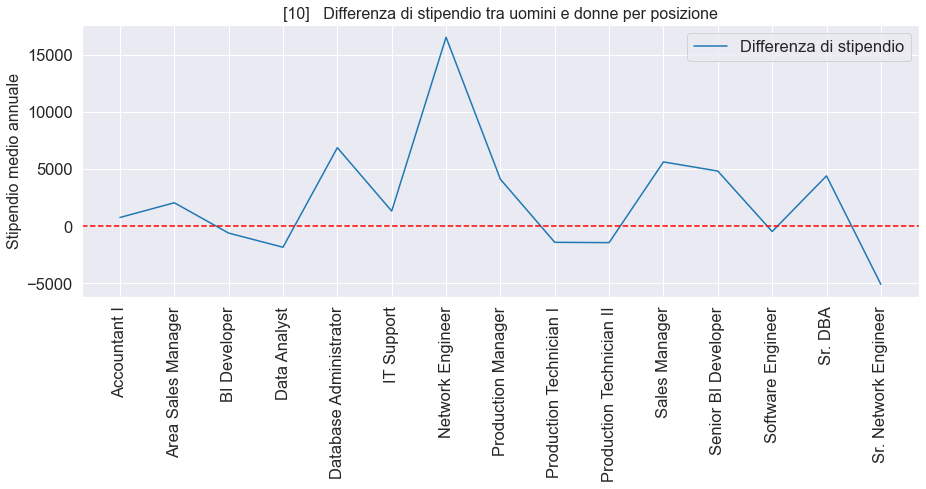

In [194]:
plt.rcParams["figure.figsize"] = (15, 5)
ax = df2.plot(title="[10]   Differenza di stipendio tra uomini e donne per posizione")
ax.axhline(0, linestyle="--", color="r")
plt.ylabel("Stipendio medio annuale")
plt.xticks(df2.index, df2["Posizione"], rotation=90)
plt.show()

In [195]:
df_medie = pd.crosstab(df["Position"], columns="Media degli stipendi", values=df["Salary"], 
                       aggfunc=np.mean, colnames=[""]).reset_index()
# selezioniamo da df_medie solo le posizioni contenute in df2, ovvero quelle che hanno sia uomini che donne:
df_medie["val"] = df_medie["Position"].isin(df2["Posizione"]) 
for index, row in df_medie.iterrows():
    if not row[2]:
        df_medie = df_medie.drop(axis=0, index=index)
df_medie = df_medie.reset_index()

In [196]:
df2["Media degli stipendi"] = df_medie["Media degli stipendi"]

In [197]:
df2

,Posizione,Differenza di stipendio,Media degli stipendi
0,Accountant I,761.500000,63507.666667
1,Area Sales Manager,2050.300000,64932.555556
2,BI Developer,-606.666667,95465.000000
3,Data Analyst,-1844.466667,89756.875000
4,Database Administrator,6874.250000,108499.600000
5,IT Support,1323.666667,63684.375000
6,Network Engineer,16550.833333,61605.000000
7,Production Manager,4108.708333,75294.500000
8,Production Technician I,-1414.152387,55524.175182
9,Production Technician II,-1441.191892,64892.210526


In [198]:
l = []
for index, row in df2.iterrows():
    perc = round((np.absolute(row[1])*100)/row[2], 2)
    l.append(perc)
df2["Scarto percentuale"] = l 

In [199]:
df2=df2.drop(columns=["Differenza di stipendio", "Media degli stipendi"]).set_index("Posizione")

In [200]:
df2.iplot(kind="bar", color=colors, title="[11]   Scarto percentuale tra lo stipendio degli uomini e lo stipendio delle donne per posizione", yTitle="Scarto percentuale")

Il valore 0 nel grafico [10] rappresenta l'assenza di variazioni nello stipendio. In presenza di uno scarto positivo, gli impiegati guadagnano in media più delle impiegate, e viceversa. L'andamento del grafico presenta delle variazioni poco marcate sia in positivo che in negativo. L'unica eccezione è rappresentata dalla posizione di Network Engineer, che presenta una differenza di stipendio positiva più marcata.

### 4.3. Stato civile e assenze da lavoro

I boxplot che seguono mettono in relazione lo stato civile degli impiegati (espresso dalla variabile binaria "MarriedID") e le assenze da lavoro:

In [201]:
women = df.loc[df['GenderID'] == 0]
men = df.loc[df['GenderID'] == 1]
women_married = women[women["MarriedID"] == 1]["Absences"]
women_single = women[women["MarriedID"] == 0]["Absences"]
men_married = men[men["MarriedID"] == 1]["Absences"]
men_single = men[men["MarriedID"] == 0]["Absences"]

In [202]:
women_married.iplot(kind="box", title="[12]   Assenze da lavoro delle donne sposate", yTitle="Giorni di assenza", color=["#41ae76"])
women_single.iplot(kind="box", title="[13]   Assenze da lavoro delle donne single", yTitle="Giorni di assenza", color=["#41ae76"])
men_married.iplot(kind="box", title="[14]   Assenze da lavoro degli uomini sposati", yTitle="Giorni di assenza", color=["#41b6c4"])
men_single.iplot(kind="box", title="[15]   Assenze da lavoro degli uomini single", yTitle="Giorni di assenza", color=["#41b6c4"])

Se nel grafico [14] i dipendenti sposati registrano un minor numero di assenze rispetto ai colleghi single (mediana 11), la tendenza è invertita nel grafico [12]: sono le impiegate sposate ad assentarsi più spesso da lavoro (mediana 12). Inoltre, le donne single si assentano meno a lavoro (mediana 9) rispetto alle colleghe sposate.

***

# 5. Diversificazione etnica

In questa sezione verrà indagata l'eterogeneità degli impiegati nell'azienda e le eventuali relazioni dell'etnia con lo stipendio. 

### 5.1. Distribuzione del personale rispetto all'identità etnica

Nel grafico a torta che segue osserviamo la distribuzione dei dipendenti secondo l'identità etnica autodichiarata:

In [203]:
abs_freq = pd.crosstab(df["RaceDesc"], columns="Abs Freq", colnames=[""]).reset_index(level=0)

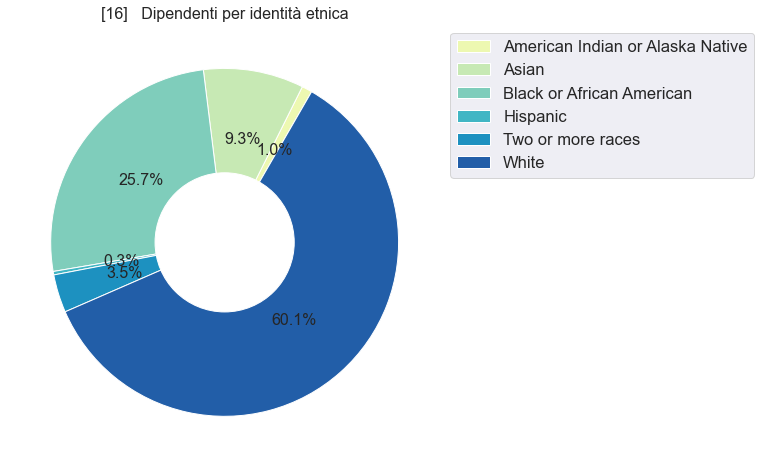

In [204]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.pie(abs_freq["Abs Freq"], startangle=60, labels=None, colors=colors,
        autopct="%1.1f%%")
plt.title("[16]   Dipendenti per identità etnica")
plt.legend(bbox_to_anchor=(1, 1), loc="best", labels =abs_freq["RaceDesc"])
circle = plt.Circle(xy=(0,0), radius=0.4, facecolor='white') #effetto torta vuota
plt.gca().add_artist(circle)
plt.show()

I dipendenti Bianchi ("White") sono maggioritari, ma anche il gruppo Nero o Afroamericano ("Black or African American") ha una presenza consistente, seguito dagli Asiatici ("Asian") e dagli Ispanici ("Hispanic"). Minoritari sono i gruppi composti da dipendenti che si identificano in due o più razze ("Two or more races").

Di seguito mostriamo la distribuzione nelle diverse sezioni aziendali:

In [205]:
d = pd.crosstab(df["Department"], df["Races"], normalize="index")*100
ax= d.iplot(kind="bar", barmode="stack", title="[17]   Composizione delle sezioni aziendali rispetto all'identità etnica", 
            yTitle="Frequenza percentuale", color=colors)

La distribuzione dei dipendenti non è uniforme. L'Executive Office appare la sezione meno diversificata, ma questo è dovuto al fatto che ha un solo dipendente. Le sezioni che sono composte da più gruppi etnici sono quelle di Production e Sales. Production, nonostante sia una delle sezioni più rappresentative (contiene infatti tutti i gruppi etnici), contiene anche la quota più alta di dipendenti bianchi. 

Come già anticipato in fase di enrichment (par. 1.2) dipendenti che hanno dichiarato di appartenere alla cultura ispanica sono stati raccolti nel gruppo Hispanic, anziché ascriverli alle loro identità etniche. Si è scelto infatti di dare prevalente importanza all'elemento culturale. 

Il grafico che segue mostra la composizione del gruppo ispanico:

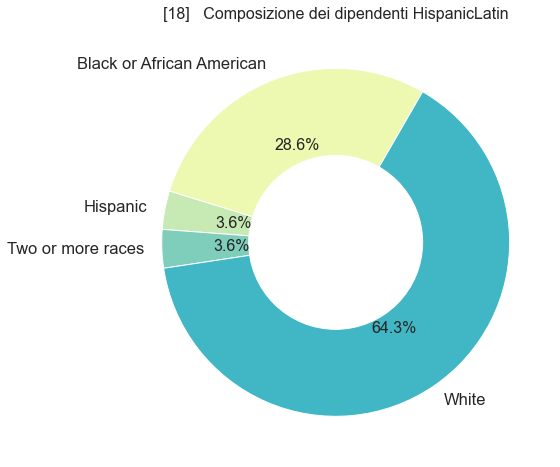

In [206]:
plt.rcParams["figure.figsize"] = [12, 8]
df_hisp = df[df["HispanicLatino"]=="Yes"]
hispanic = df[df["HispanicLatino"]=="yes"]
df_hisp = df_hisp.append(hispanic, ignore_index=True) #corretto errore di battitura in dataset 

race=pd.crosstab(df_hisp["RaceDesc"], columns="Absolute Frequence")["Absolute Frequence"] #lista con le frequenze assolute
races=race.index.values #lista con le labels
palette = ("#143F6B","#F55353","#FEB139", "#F6F54D", "#F76E11", "#FA4EAB")
fig1, ax1 = plt.subplots()
ax1.pie(race, labels=races, autopct="%1.1f%%", startangle=60, colors=colors)
circle = plt.Circle(xy=(0,0), radius=0.5, facecolor='white') #effetto torta vuota
plt.gca().add_artist(circle)
plt.title("[18]   Composizione dei dipendenti HispanicLatin")
plt.show()

### 5.2. Stipendio e identità etnica

Di seguito mostriamo il rapporto tra l'etnia dei dipendenti e lo stipendio medio nelle varie sezioni aziendali:

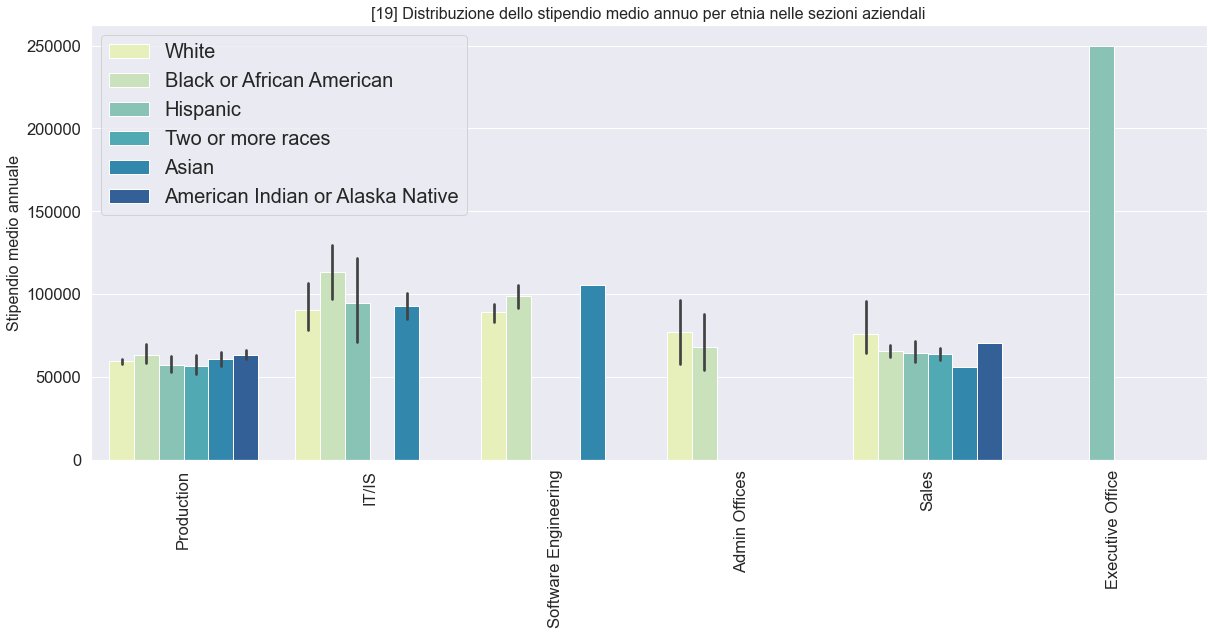

In [207]:
plt.rcParams["figure.figsize"] = [20,8]
ax = sns.barplot(x="Department", y="Salary", hue="Races", data=df, palette=colors)
plt.legend(loc=(2), prop={"size":20})
plt.xlabel("")
plt.ylabel("Stipendio medio annuale")
plt.title("[19] Distribuzione dello stipendio medio annuo per etnia nelle sezioni aziendali")
plt.xticks(rotation=90)
plt.show()

Verifichiamo l'affidabilità dei valori medi per ciascuna delle distribuzioni:

In [208]:
print("Distribuzioni con media non affidabile e con outliers:\n")
for dep in df.Department.unique():
    d = df[df["Department"]==dep] # seleziono un subset da df per dipartimento
    for race in d.Races.unique():
        r = d[d["Races"]==race] # selezione un subset da d per razza
        # se la media non è affidabile e se ci sono outliers, stampami il valore della media del salario di r
        # prima e dopo l'eliminazione degli outliers
        if not mean_reliable(r["Salary"]): 
            if check_outliers(r["Salary"]):
                print(dep, "-", race, "\nMedia con outliers:", round(r.Salary.mean(), 2))
                r = df_no_outliers(r, "Salary")
                print("Media senza outliers:", round(r.Salary.mean(), 2), "\n")

Distribuzioni con media non affidabile e con outliers:

Production - Black or African American 
Media con outliers: 62969.72
Media senza outliers: 60212.54 

IT/IS - White 
Media con outliers: 90251.96
Media senza outliers: 82030.77 

Sales - White 
Media con outliers: 75932.42
Media senza outliers: 66471.73 



Come mostrato, per alcune distribuzioni la media affidabile (senza outliers) è leggermente inferiore alla media mostrata nel grafico [19]. Ciononostante, in nessuna sezione aziendale si possono riscontrare differenze significative nello stipendio dei gruppi etnici.

In [209]:
mean_reliable(df.Salary)

False

In [210]:
if mean_reliable(df_no_outliers(df, "Salary")["Salary"]):
    print(round(df_no_outliers(df, "Salary")["Salary"].mean(), 2))

62841.65


In [211]:
for race in df.Races.unique():
    ad = df[df.RaceDesc==race]
    print("Etnia:", race, "\nMedia affidabile:", mean_reliable(ad["Salary"]), "\n")

Etnia: White 
Media affidabile: False 

Etnia: Black or African American 
Media affidabile: False 

Etnia: Hispanic 
Media affidabile: True 

Etnia: Two or more races 
Media affidabile: True 

Etnia: Asian 
Media affidabile: True 

Etnia: American Indian or Alaska Native 
Media affidabile: True 



In [212]:
for race in df.Races.unique():
    ad = df[df.RaceDesc==race]
    if not mean_reliable(ad["Salary"]):
        ad = df_no_outliers(ad, "Salary")
    print("Etnia:", race, "\nMedia dello stipendio", round(ad["Salary"].mean(), 2), "\n")

Etnia: White 
Media dello stipendio 60863.63 

Etnia: Black or African American 
Media dello stipendio 67713.58 

Etnia: Hispanic 
Media dello stipendio 83667.0 

Etnia: Two or more races 
Media dello stipendio 59998.18 

Etnia: Asian 
Media dello stipendio 68521.21 

Etnia: American Indian or Alaska Native 
Media dello stipendio 65806.0 



Come osserviamo dal confronto delle medie, solo i gruppi "White" e "Two or more Races" hanno uno stipendio medio inferiore alla media globale.

***

# 6. Terminazione del contratto

Dall'analisi della distribuzione dei dipendenti emerge che il 33.4% dei lavoratori non fa più parte dell'azienda. Per tale ragione dedichiamo l'ultima parte della nostra analisi al tema del fine contratto.

### 6.1 Analisi delle cause di licenziamento

Gli ex-dipendenti possono essere suddivisi in dipendenti licenziati con motivazione e in dipendenti che hanno presentato dimissioni volontarie:

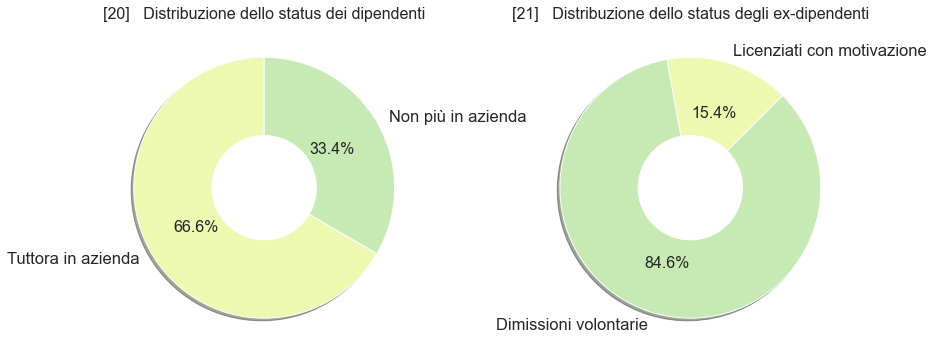

In [213]:
plt.figure(figsize=(14,6))
#creazione del primo subplot
plt.subplot(1,2,1)
EmpStat1 = pd.crosstab(df['Termd'],["Quantity"]) #creazione del dataframe che verrà usato per il grafico a torta
plt.pie(EmpStat1["Quantity"], labels=["Tuttora in azienda", "Non più in azienda"], colors=colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title("[20]   Distribuzione dello status dei dipendenti")
plt.xticks(rotation=90)
circle = plt.Circle(xy=(0,0), radius=0.4, facecolor='white') #effetto torta vuota
plt.gca().add_artist(circle)
#creazione del secondo subplot
plt.subplot(1,2,2)
df_ex_dip=df[df["EmploymentStatus"]!="Active"] #dataframe contenente solo gli ex-dipendenti
EmpStat2 = pd.crosstab(df_ex_dip['EmploymentStatus'],["Quantity"]) #creazione del dataframe che verrà usato per il grafico a torta
plt.pie(EmpStat2["Quantity"], labels=["Licenziati con motivazione", "Dimissioni volontarie"], colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 45)
plt.title("[21]   Distribuzione dello status degli ex-dipendenti")
plt.xticks(rotation=90)
circle = plt.Circle(xy=(0,0), radius=0.4, facecolor='white') #effetto torta vuota
plt.gca().add_artist(circle)
plt.show()

Le motivazioni della terminazione del contratto si distribuiscono diversamente tra dimissioni volontarie e licenziamenti con dimissioni:

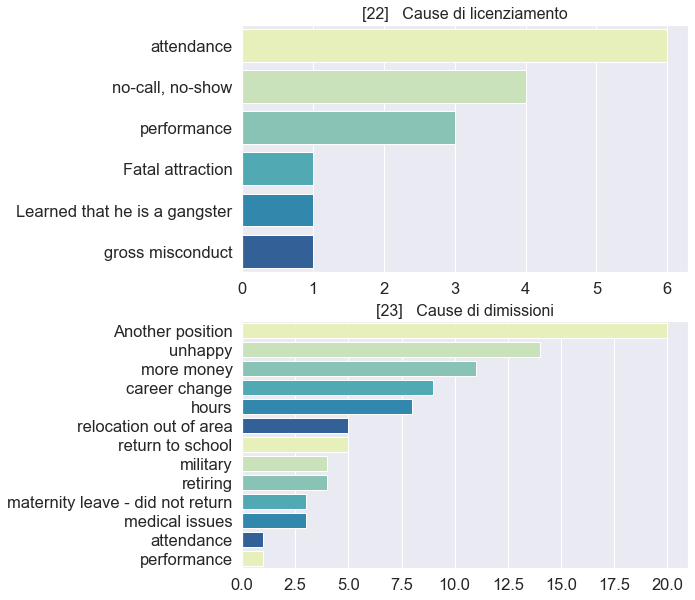

In [214]:
plt.figure(figsize=(8,10))
#creazione del primo subplot
plt.subplot(211)
vdf1=df[df['EmploymentStatus']=="Terminated for Cause"] #dataframe contenente solo gli ex-dipendenti licenziati con motivazione
df_term = pd.crosstab(vdf1["TermReason"],["Quantity"]).sort_values(by="Quantity", ascending=False)
sns.barplot(x=df_term["Quantity"], y=df_term.index, data=df_term, palette=colors)
plt.title("[22]   Cause di licenziamento")
plt.xlabel("")
plt.ylabel("")
#creazione del secondo subplot
plt.subplot(212)
vdf2=df[df['EmploymentStatus']=="Voluntarily Terminated"] #dataframe contenente solo gli ex-dipendenti che si sono dimessi
df_term = pd.crosstab(vdf2["TermReason"],["Quantity"]).sort_values(by="Quantity", ascending=False)
sns.barplot(x=df_term["Quantity"], y=df_term.index, data=df_term, palette=colors)
plt.title("[23]   Cause di dimissioni")
plt.xlabel("")
plt.ylabel("")
plt.show()

Per i licenziamenti con motivazione si possono individuare due grandi gruppi di motivazioni: licenziamenti per motivi di performance (che comprendono le categorie di "attendance", "performance" e "no call, no show") e per motivi di condotta (che comprendono le categorie di "fatal attraction", "learned that he is a gangster" e "gross misconduct").

Invece per le dimissioni volontarie si possono individuare due grandi gruppi di motivazioni: dimissioni per motivi di insoddisfazione personale (che comprendono le categorie di "unhappy","more money", "hours" e "relocation out of area") e per scelte di vita personali (che comprendono le categorie di "Another position", "career change", "return to school", "military", "retiring", "maternity leave - did not return" e "medical issues").

### 6.2. Sottocategorie di licenziati e correlazione tra soddisfazione e performance

In [215]:
mean_reliable(df.EmpSatisfaction)

True

Nei seguenti grafici osserviamo i livelli di engagement, soddisfazione e performance per categorie di dimessi volontariamente e licenziati con motivazione:

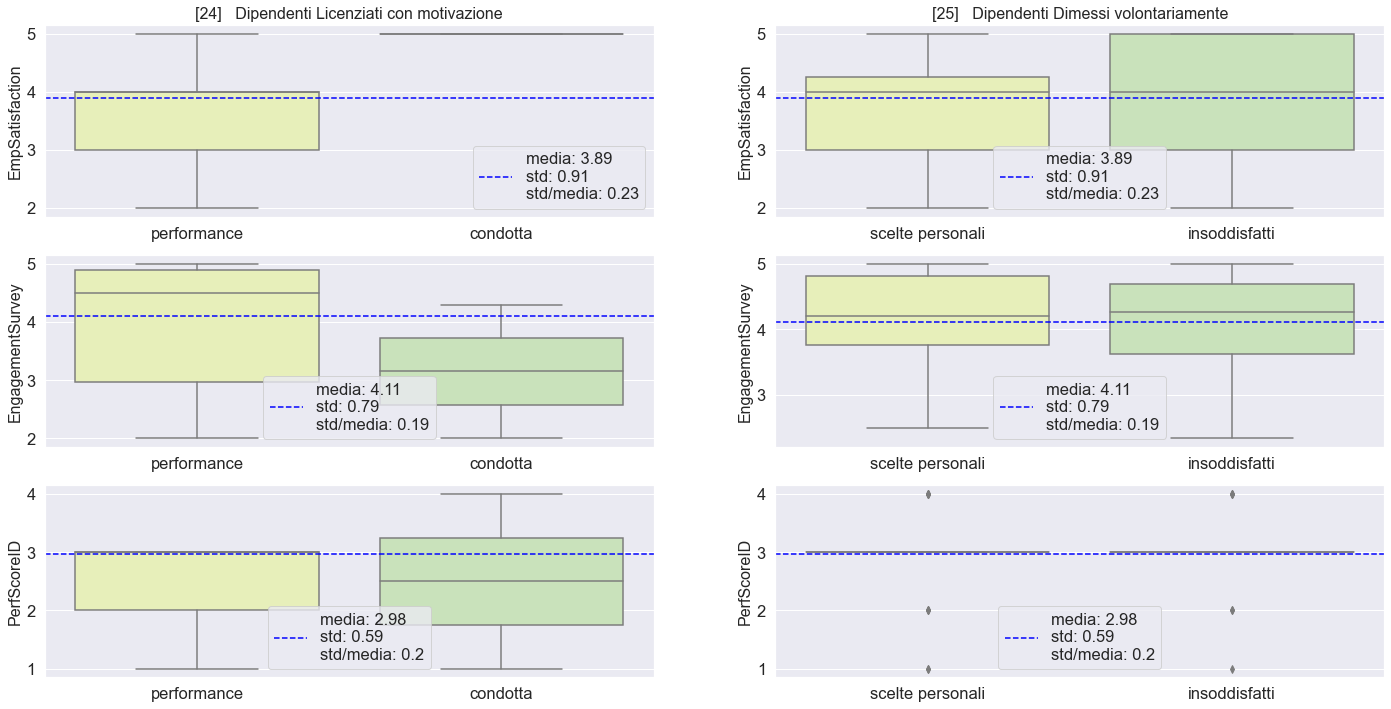

In [216]:
plt.rcParams["figure.figsize"] = [24,12]
plt.subplot(3,2,1)
#creazione del primo subplot
labels="media: " + str(round(df["EmpSatisfaction"].mean(),2)) + "\n" + "std: " + str(round(df["EmpSatisfaction"].std(),2)) +"\n" + "std/media: " + str(round(df["EmpSatisfaction"].std()/df["EmpSatisfaction"].mean(),2))
plt.title("[24]   Dipendenti Licenziati con motivazione")
sns.boxplot(x="MotiviLicenziati", y = "EmpSatisfaction", data=df, palette=colors) #creazione del boxplot
plt.axhline(df["EmpSatisfaction"].mean(), c="b",linestyle="--", label=labels) #linea della media
plt.legend()
plt.xlabel("")
plt.subplot(3,2,2)
#creazione del secondo subplot
plt.title("[25]   Dipendenti Dimessi volontariamente")
sns.boxplot(x="MotiviDimessi", y = "EmpSatisfaction", data=df, palette=colors) #creazione del boxplot
plt.axhline(df["EmpSatisfaction"].mean(), c="b", linestyle="--", label=labels) #linea della media
plt.legend()
plt.xlabel("")
plt.subplot(3,2,3)
#creazione del terzo subplot
labels="media: " + str(round(df["EngagementSurvey"].mean(),2)) + "\n" + "std: " + str(round(df["EngagementSurvey"].std(),2)) +"\n" + "std/media: " + str(round(df["EngagementSurvey"].std()/df["EngagementSurvey"].mean(),2))
sns.boxplot(x="MotiviLicenziati", y = "EngagementSurvey", data=df, palette=colors) #creazione del boxplot
plt.axhline(df["EngagementSurvey"].mean(), c="b", linestyle="--", label=labels) #linea della media
plt.legend()
plt.xlabel("")
plt.subplot(3,2,4)
#creazione del quarto subplot
sns.boxplot(x="MotiviDimessi", y = "EngagementSurvey", data=df, palette=colors) #creazione del boxplot
plt.axhline(df["EngagementSurvey"].mean(), c="b", linestyle="--", label=labels) #linea della media
plt.legend()
plt.xlabel("")
plt.subplot(3,2,5)
#creazione del quinto subplot
labels="media: " + str(round(df["PerfScoreID"].mean(),2)) + "\n" + "std: " + str(round(df["PerfScoreID"].std(),2)) +"\n" + "std/media: " + str(round(df["PerfScoreID"].std()/df["PerfScoreID"].mean(),2))
sns.boxplot(x="MotiviLicenziati", y = "PerfScoreID", data=df, palette=colors) #creazione del boxplot
plt.axhline(df["PerfScoreID"].mean(), c="b", linestyle="--", label=labels) #linea della media
plt.legend()
plt.xlabel("")
plt.subplot(3,2,6)
#creazione del sesto subplot
sns.boxplot(x="MotiviDimessi", y = "PerfScoreID", data=df, palette=colors) #creazione del boxplot
plt.axhline(df["PerfScoreID"].mean(), c="b", linestyle="--", label=labels) #linea della media
plt.legend()
plt.xlabel("")
plt.show()

Confrontando i grafici della colonna [24] si può osservare come i dipendenti licenziati per motivi di performance abbiano anche un livello di soddisfazione inferiore alla media, il che successivamente ci ha portato a considerare l'esplorazione di una correlazione tra performance e soddisfazione dei dipendenti con performance inferiore alla media. 

Invece nei grafici della colonna [25], che mostra i livelli di soddisfazione, engagement e performance degli ex-dipendenti dimessi volontariamente, non ci sono significativi discostamenti rispetto alla media.

Indagando le distribuzioni dei valori di performance e soddisfazione per i dipendenti licenziati con motivazione e i dipendenti con performance inferiore alla media, verifichiamo anzitutto la loro normalità:

In [217]:
ndf1=df[df['EmploymentStatus']=="Terminated for Cause"] #dipendenti licenziati con motivazione
ndf2=df[df['PerfScoreID']<=df['PerfScoreID'].mean()] #dipendenti con performance inferiore alla media

In [218]:
#test di normalità per i dipendenti licenziati con motivazione
is_normal(ndf1.PerfScoreID)

True

In [219]:
is_normal(ndf1.EmpSatisfaction)

False

In [220]:
#test di normalità per i dipendenti con performance inferiore alla media
is_normal(ndf2.PerfScoreID)

False

In [221]:
is_normal(ndf2.EmpSatisfaction)

False

Si può notare come per entrambi i tipi di dipendenti (dipendenti licenziati con motivazione e i dipendenti con performance inferiore alla media) non abbiamo una distribuzione normale per le variabili di performance e soddisfazione. Per questo motivo si è deciso di utilizzare il coefficiente di Spearman (ρ) per misurare la correlazione.

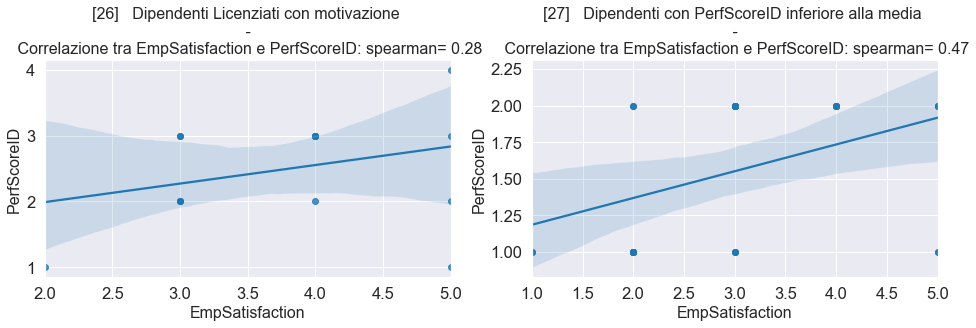

In [222]:
plt.rcParams["figure.figsize"] = [16,4]
#creazione del primo subplot
plt.subplot(1,2,1)
sns.regplot(x='EmpSatisfaction', y = 'PerfScoreID', data=ndf1)
titolo="[26]   Dipendenti Licenziati con motivazione \n - \n Correlazione tra EmpSatisfaction e PerfScoreID: spearman= " + str(round(ndf1["EmpSatisfaction"].corr(ndf1["PerfScoreID"], method ='spearman'),2))
plt.title(titolo)
#creazione del secondo subplot
plt.subplot(1,2,2)
sns.regplot(x='EmpSatisfaction', y = 'PerfScoreID', data=ndf2)
titolo="[27]   Dipendenti con PerfScoreID inferiore alla media \n - \n Correlazione tra EmpSatisfaction e PerfScoreID: spearman= " + str(round(ndf2["EmpSatisfaction"].corr(ndf2["PerfScoreID"], method ='spearman'),2))
plt.title(titolo)
plt.show()

Rispetto a una possibile correlazione tra grado di soddisfazione in azienda e livello di performance, il grafico [26] mostra come per i dipendenti licenziati con motivazione non ci sia una correlazione significativa (i.e. maggiore di 0.5 in valore assoluto), mentre il grafico [27] mostra una debole correlazione positiva per i dipendenti con performance inferiore alla media.

### 5.3. Relazione tra durata dei contratti e stipendio degli ex-dipendenti

I boxplot che seguono mostrano, rispettivamente, la distribuzione degli stipendi rispetto alla sezione aziendale e la distribuzione della durata del contratto rispetto alla sezione aziendale:

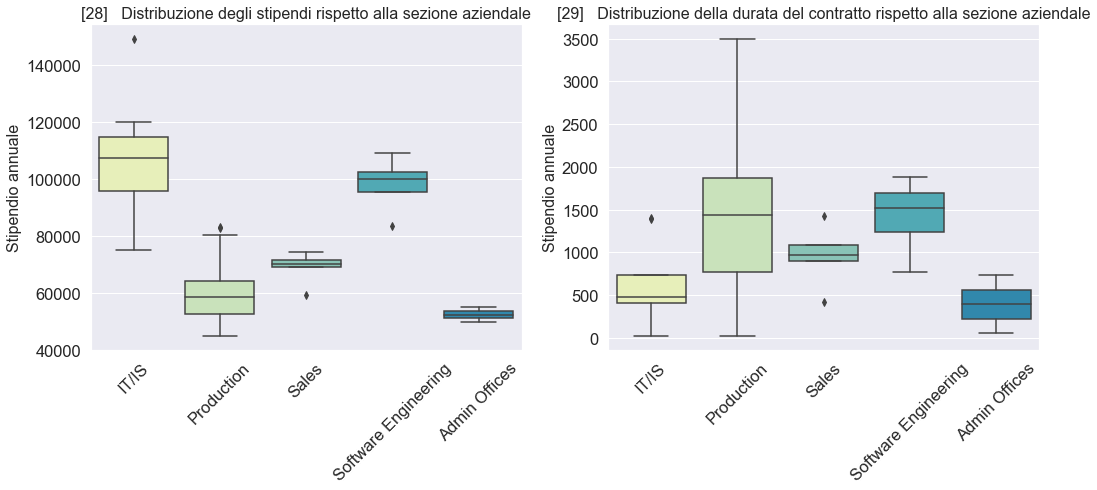

In [223]:
plt.rcParams["figure.figsize"] = [17,6]
#creazione del primo subplot
plt.subplot(1,2,1)
sns.boxplot(x="Department", y = "Salary", data=df[df["DurataContratto"].notna()], palette=colors)
plt.ylabel("Stipendio annuale")
plt.xlabel("")
plt.xticks(rotation=45)
plt.title("[28]   Distribuzione degli stipendi rispetto alla sezione aziendale")
#creazione del secondo subplot
plt.subplot(1,2,2)
sns.boxplot(x="Department", y = "DurataContratto", data=df[df["DurataContratto"].notna()], palette=colors)
plt.xticks(rotation=45)
plt.ylabel("Stipendio annuale")
plt.xlabel("")
plt.title("[29]   Distribuzione della durata del contratto rispetto alla sezione aziendale")
plt.show()

Dalla distribuzione degli stipendi (grafico [28]) e della durata dei contratti (grafico [29]) di ogni sezione aziendale, osserviamo che le sezioni "IT/IS" e "Production" registrano dati opposti: nella prima osserviamo stipendi alti, ma breve durata dei contratti; nella seconda osserviamo stipendi bassi, ma contratti più lunghi.

Di seguito effettuiamo i testi di normalità per la scelta dell'indice di correlazione:

In [224]:
ndf_it=df[df['Department']=="IT/IS"]
ndf_prod=df[df['Department']=="Production"]

In [225]:
#test di normalità per i dipendenti licenziati con motivazione
is_normal(ndf_it.Salary)

False

In [226]:
is_normal(ndf_it.DurataContratto)

False

In [227]:
#test di normalità per i dipendenti con performance inferiore alla media
is_normal(ndf_prod.Salary)

False

In [228]:
is_normal(ndf_prod.DurataContratto)

False

Come mostrato dagli esiti dei test, nessuna delle variabili ha una distribuzione normale. Di seguito quindi useremo l'indice di Spearman (ρ) per misurare le correlazioni.

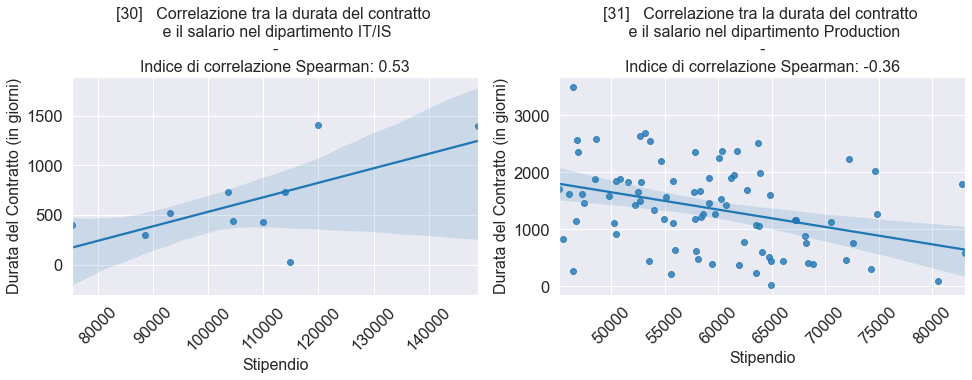

In [229]:
plt.rcParams["figure.figsize"] = [16,4]
#creazione del primo subplot
plt.subplot(1,2,1)
sns.regplot(x='Salary', y = 'DurataContratto', data=ndf_it[ndf_it["DurataContratto"].notna()])
titolo="[30]   Correlazione tra la durata del contratto \n e il salario nel dipartimento IT/IS" + "\n"+"-"+"\n" + "Indice di correlazione Spearman: " + str(round(sp.spearmanr(ndf_it["Salary"], ndf_it["DurataContratto"], nan_policy="omit")[0], 2))
plt.title(titolo)
plt.ylabel("Durata del Contratto (in giorni)")
plt.xlabel("Stipendio")
plt.xticks(rotation=45)
#creazione del secondo subplot
plt.subplot(1,2,2)
sns.regplot(x='Salary', y = 'DurataContratto', data=ndf_prod[ndf_prod["DurataContratto"].notna()])
titolo="[31]   Correlazione tra la durata del contratto \n e il salario nel dipartimento Production" + "\n"+"-"+"\n" + "Indice di correlazione Spearman: " + str(round(sp.spearmanr(ndf_prod["Salary"], ndf_prod["DurataContratto"], nan_policy="omit")[0], 2))
plt.title(titolo)
plt.ylabel("Durata del Contratto (in giorni)")
plt.xlabel("Stipendio")
plt.xticks(rotation=45)
plt.show()

Osserviamo che la sezione di IT/IS (grafico [30]) registra una correlazione positiva significativa (i.e. maggiore di 0.5 in valore assoluto) tra stipendio e durata del contratto, mentre per la sezione di Production c'è una correlazione debolmente negativa (grafico [31]).